In [102]:

import numpy as np
import pandas as pd
import re

In [103]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [104]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [105]:
df.duplicated().sum()

np.int64(121)

In [106]:

df.sample(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
3492,flat,dlf the arbour,sector 63,7.8,19747.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4.0,4.0,0,not available,6.0,NaN,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


# 1.areaWithType

In [107]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2026,0.75,600.0,Plot area 600(55.74 sq.m.)
204,3.65,2395.0,Super Built up area 1870(173.73 sq.m.)Built Up area: 1869 sq.ft. (173.64 sq.m.)
2587,2.40,2700.0,Plot area 300(250.84 sq.m.)
3434,0.48,900.0,Carpet area: 100 (83.61 sq.m.)
2475,1.35,1500.0,Super Built up area 1530(142.14 sq.m.)Built Up area: 1350 sq.ft. (125.42 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.)


In [108]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [109]:

# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [110]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [111]:
df['areaWithType'] = df['areaWithType'].astype(str)
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [112]:

df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
774,0.35,flat,539.0,Carpet area: 547 (50.82 sq.m.),NaN,NaN,547.0
2339,1.23,flat,1480.0,Super Built up area 1480(137.5 sq.m.),1480.0,NaN,NaN
1728,0.65,flat,1526.0,Carpet area: 1526 (141.77 sq.m.),NaN,NaN,1526.0
479,0.50,flat,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),NaN,750.0,605.0
1871,0.40,flat,602.0,Super Built up area 602(55.93 sq.m.)Carpet area: 548 sq.ft. (50.91 sq.m.),602.0,NaN,548.0


In [113]:
df.duplicated().sum()

np.int64(121)

In [114]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [115]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,3.10,house,3653.0,Plot area 3653(339.37 sq.m.),NaN,NaN,NaN
10,0.75,house,1170.0,Plot area 130(108.7 sq.m.),NaN,NaN,NaN
14,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,NaN,NaN
23,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
26,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,NaN,NaN


In [116]:

df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [117]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [118]:

all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,3.10,house,3653.0,Plot area 3653(339.37 sq.m.),NaN,NaN,NaN
10,0.75,house,1170.0,Plot area 130(108.7 sq.m.),NaN,NaN,NaN
14,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,NaN,NaN
23,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
26,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,NaN,NaN


In [119]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [120]:

# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [121]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [122]:

all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,3.10,house,3653.0,Plot area 3653(339.37 sq.m.),NaN,3653.00,NaN
10,0.75,house,1170.0,Plot area 130(108.7 sq.m.),NaN,130.00,NaN
14,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,864.00,NaN
23,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
26,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,288.00,NaN
29,11.95,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
33,2.15,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
34,15.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
37,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,240.00,NaN
41,3.50,house,1620.0,Plot area 180(150.5 sq.m.),NaN,180.00,NaN


In [123]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [124]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [125]:

all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,3.10,house,3653.0,Plot area 3653(339.37 sq.m.),NaN,3653.00,NaN
10,0.75,house,1170.0,Plot area 130(108.7 sq.m.),NaN,1170.00,NaN
14,0.70,house,864.0,Plot area 864(80.27 sq.m.),NaN,864.00,NaN
23,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
26,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,2592.00,NaN
29,11.95,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
33,2.15,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
34,15.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
37,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,240.00,NaN
41,3.50,house,1620.0,Plot area 180(150.5 sq.m.),NaN,1620.00,NaN


In [126]:

# update the original dataframe
df.update(all_nan_df)

In [127]:

df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

In [128]:

df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,not available,1.0,South,undefined,NaN,NaN,NaN,NaN,NaN,2228.0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,not available,3.0,South,undefined,"['Airia Mall', 'GD Goenka School', 'The Millennium School', 'Polaris Hospital', 'Park Hospital', 'Medanta The Medicity', 'Artemis Hospital', 'Medanta Dialysis Center', 'IndusInd Bank', 'Children Park', 'Gurugram Railway Station', 'Lemon Tree Hotel', 'Vatika Business Park', 'Bharat Petrol Pump', 'Tau Devi Lal Sports Complex']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,6000.0,NaN
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,not available,12.0,North-West,0 to 1 Year Old,"['Sector 53-54 Metro Station', 'Sahara Mall', 'Golf Course Road', 'Mehrauli-Gurgaon Rd', 'Shiv Nadar School', 'Sushant University', 'Indira Gandhi International Airport', 'Surajgarh Gurgaon', 'Duke Horse Riding Club', 'Ramada by Wyndham Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'PVR Drive in Theatre', 'SkyJumper Trampoline Park', 'F9 Go Karting Gurgaon']",NaN,NaN,NaN,2895.0,NaN
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,not available,8.0,NaN,12/01/2024,"['The Esplanade Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH 48', 'MDS Public School', 'Nest Pre School', 'Miracles Apollo Hospital', 'IGI Airport', 'KFG Sports Club', 'Garhi harsaru Railway station', 'Holiday Inn', 'SkyJumper Trampoline Park']",NaN,"['Lift(s)', 'Park']",NaN,NaN,590.0
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,not available,21.0,NaN,1 to 5 Year Old,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3653.0,NaN


# 2.additionalRoom

In [129]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [130]:

# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col, case=False, na=False).astype(int)

In [131]:

df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3377,servant room,0,1,0,0,0
3658,not available,0,0,0,0,0
1972,not available,0,0,0,0,0
1726,"study room,pooja room,servant room",1,1,0,1,0
2368,"pooja room,study room,servant room,store room",1,1,1,1,0


In [132]:

df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,not available,1.0,South,undefined,NaN,NaN,NaN,NaN,NaN,2228.0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,not available,3.0,South,undefined,"['Airia Mall', 'GD Goenka School', 'The Millennium School', 'Polaris Hospital', 'Park Hospital', 'Medanta The Medicity', 'Artemis Hospital', 'Medanta Dialysis Center', 'IndusInd Bank', 'Children Park', 'Gurugram Railway Station', 'Lemon Tree Hotel', 'Vatika Business Park', 'Bharat Petrol Pump', 'Tau Devi Lal Sports Complex']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,6000.0,NaN,0,0,0,0,0
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,not available,12.0,North-West,0 to 1 Year Old,"['Sector 53-54 Metro Station', 'Sahara Mall', 'Golf Course Road', 'Mehrauli-Gurgaon Rd', 'Shiv Nadar School', 'Sushant University', 'Indira Gandhi International Airport', 'Surajgarh Gurgaon', 'Duke Horse Riding Club', 'Ramada by Wyndham Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'PVR Drive in Theatre', 'SkyJumper Trampoline Park', 'F9 Go Karting Gurgaon']",NaN,NaN,NaN,2895.0,NaN,0,0,0,0,0
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,not available,8.0,NaN,12/01/2024,"['The Esplanade Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH 48', 'MDS Public School', 'Nest Pre School', 'Miracles Apollo Hospital', 'IGI Airport', 'KFG Sports Club', 'Garhi harsaru Railway station', 'Holiday Inn', 'SkyJumper Trampoline Park']",NaN,"['Lift(s)', 'Park']",NaN,NaN,590.0,0,0,0,0,0
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,not available,21.0,NaN,1 to 5 Year Old,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3653.0,NaN,0,0,0,0,0


 # 3.agePossession

In [133]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
12/01/2023              22
By 2023                 19
By 2024                 17
12/01/2024              16
03/01/2024              14
10/01/2024               8
01/01/2024               8
12/01/2025               7
06/01/2024               7
08/01/2023               7
11/01/2023               5
08/01/2024               4
09/01/2023               4
07/01/2024               4
10/01/2023               4
By 2025                  4
05/01/2024               3
02/01/2024               3
01/01/2025               3
11/01/2024               3
09/01/2025               2
08/01/2025               2
01/01/2026               2
12/01/2026               2
06/01/2027               2
By 2027                  2
07/01/2027               2
07/01/2025               2
03/01/2025    

In [134]:

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [135]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [136]:
df['agePossession'].value_counts()


agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              485
Old Property           310
Under Construction     132
Name: count, dtype: int64

In [137]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,not available,1.0,South,Undefined,NaN,NaN,NaN,NaN,NaN,2228.0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,not available,3.0,South,Undefined,"['Airia Mall', 'GD Goenka School', 'The Millennium School', 'Polaris Hospital', 'Park Hospital', 'Medanta The Medicity', 'Artemis Hospital', 'Medanta Dialysis Center', 'IndusInd Bank', 'Children Park', 'Gurugram Railway Station', 'Lemon Tree Hotel', 'Vatika Business Park', 'Bharat Petrol Pump', 'Tau Devi Lal Sports Complex']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,6000.0,NaN,0,0,0,0,0
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,not available,12.0,North-West,New Property,"['Sector 53-54 Metro Station', 'Sahara Mall', 'Golf Course Road', 'Mehrauli-Gurgaon Rd', 'Shiv Nadar School', 'Sushant University', 'Indira Gandhi International Airport', 'Surajgarh Gurgaon', 'Duke Horse Riding Club', 'Ramada by Wyndham Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'PVR Drive in Theatre', 'SkyJumper Trampoline Park', 'F9 Go Karting Gurgaon']",NaN,NaN,NaN,2895.0,NaN,0,0,0,0,0
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,not available,8.0,NaN,Undefined,"['The Esplanade Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH 48', 'MDS Public School', 'Nest Pre School', 'Miracles Apollo Hospital', 'IGI Airport', 'KFG Sports Club', 'Garhi harsaru Railway station', 'Holiday Inn', 'SkyJumper Trampoline Park']",NaN,"['Lift(s)', 'Park']",NaN,NaN,590.0,0,0,0,0,0
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,not available,21.0,NaN,Relatively New,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3653.0,NaN,0,0,0,0,0


# 4.furnishDetails

In [138]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
636,"['6 Wardrobe', '1 Water Purifier', '1 Exhaust Fan', '5 Geyser', '1 Stove', '20 Light', '9 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
546,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
599,"['1 Water Purifier', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '2 Geyser', '1 Stove', '5 AC', '1 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Bed', '3 Wardrobe', '1 Sofa', '1 Microwave', 'No Fan', 'No Light', 'No Washing Machine']","['Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
357,"['4 Geyser', '9 Light', '1 AC', '1 Modular Kitchen', '4 Curtains', '4 Wardrobe', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Rain Water Harvesting', 'Club house / Community Center']"
1687,[],"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Piped-gas', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [139]:

# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [140]:
furnishings_df.shape

(3804, 19)

In [141]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6604\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [142]:

furnishings_df.sample(5)

,Stove,Bed,Modular Kitchen,Light,Chimney,TV,Wardrobe,Fan,Dining Table,AC,Fridge,Exhaust Fan,Water Purifier,Geyser,Curtains,Sofa,Microwave,Washing Machine
411,0,0,0,6,0,0,0,6,0,0,0,0,0,0,0,0,0,0
74,0,0,1,4,1,0,2,0,0,3,0,1,0,2,0,0,0,0
2884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,1,0,3,0,9,21,0,10,0,1,0,9,0,0,0,0


In [143]:
# applying k means clustering to categorise into three columns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [145]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

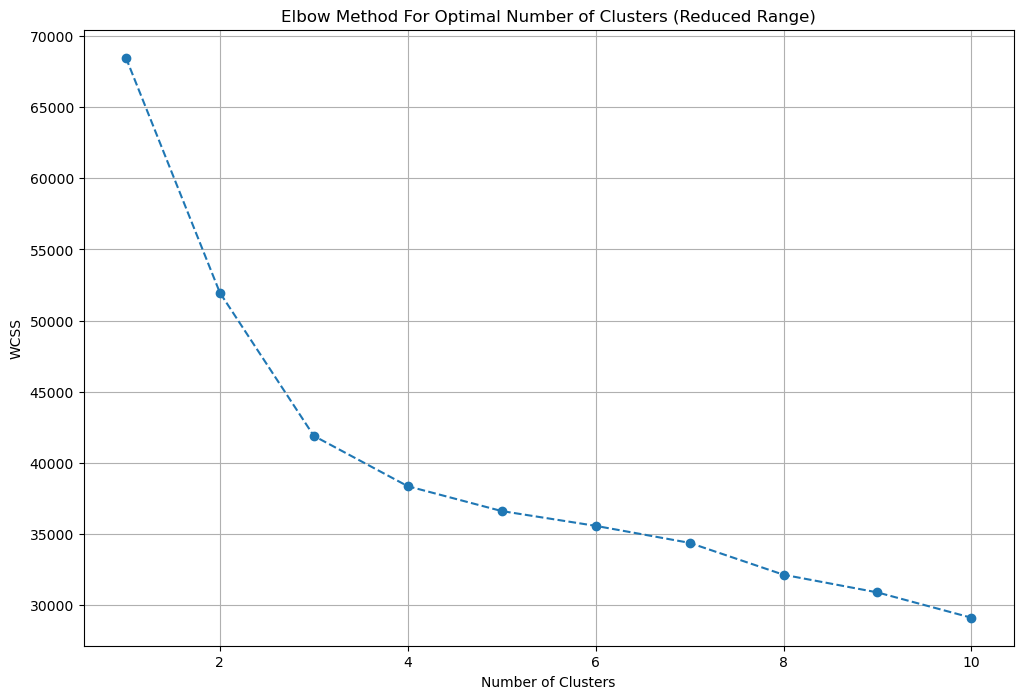

In [146]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [147]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [148]:
df = df.iloc[:,:-18]

In [149]:

df['furnishing_type'] = cluster_assignments

In [150]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished
# it is notcompletly accurate but yet gives an idea about it


,furnishDetails,furnishing_type
2777,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2300,"['2 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3697,NaN,0
3435,"['1 Fan', '1 Stove', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2792,"['5 Fan', '3 Geyser', '7 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


# 5.features

In [151]:
df[['society','features']].sample(5)

,society,features
1427,m3m heights,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
1660,chd avenue,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3226,unitech fresco,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1533,bestech park view residency,"['Security / Fire Alarm', 'Power Back-up', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3421,arjun marg/ sector- 26 phase- 1/ golf course road,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


In [71]:
df['features'].isnull().sum()

np.int64(636)

In [152]:
# missing row jisme features nahi fill kiya hua h uske liye ham log apartment me jake facilites wale column se data fill karnege
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [153]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [154]:
temp_df = df[df['features'].isnull()]

In [155]:
temp_df.shape

(636, 26)

In [156]:

x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [157]:
df.loc[temp_df.index,'features'] = x.values

In [80]:
df['features'].isnull().sum()

np.int64(482)

In [82]:
# This is used to convert lists of categories into a binary matrix
from sklearn.preprocessing import MultiLabelBinarizer
#The ast module is used to safely evaluate strings that look like Python objects 
import ast

In [158]:

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)


In [159]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [160]:
features_binary_df.shape

(3804, 130)

In [161]:

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

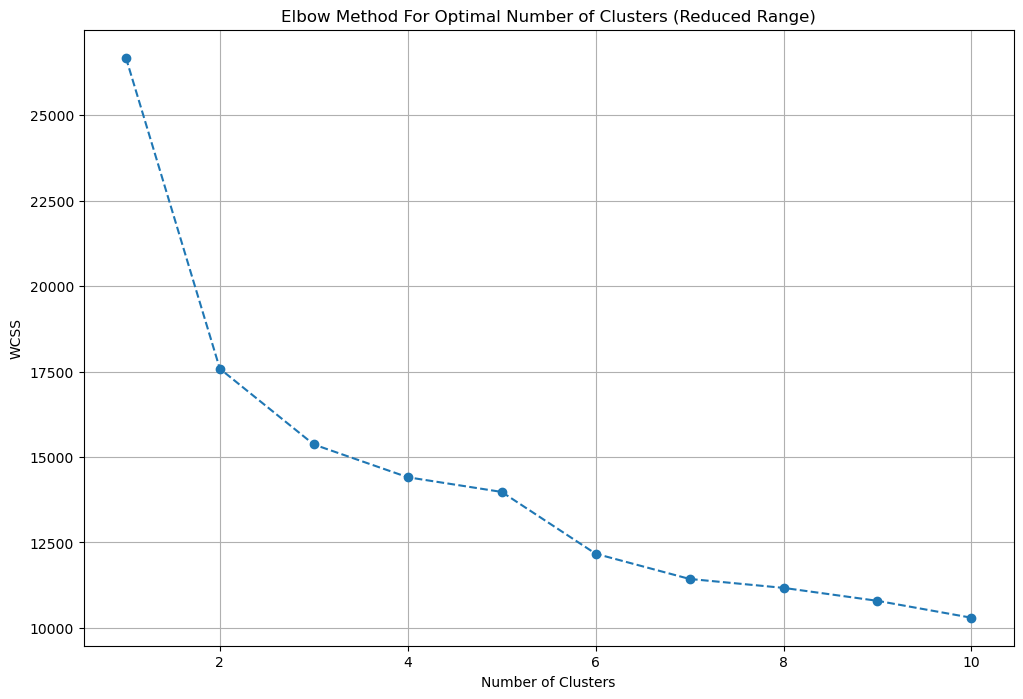

In [163]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
# this idea fails as this gives only two categories one is for nan values and the other for all the societies so we will proceed with other approaches

In [164]:

# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [165]:
df['luxury_score'] = luxury_score

In [166]:

df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 11,1.80,8078.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,not available,1.0,South,Undefined,NaN,NaN,NaN,NaN,NaN,2228.0,0,0,0,0,0,0,[],0
1,house,vipul world,sector 48,3.35,5583.0,6000.0,Built Up area: 6000 (557.42 sq.m.),6.0,5.0,3+,not available,3.0,South,Undefined,"['Airia Mall', 'GD Goenka School', 'The Millennium School', 'Polaris Hospital', 'Park Hospital', 'Medanta The Medicity', 'Artemis Hospital', 'Medanta Dialysis Center', 'IndusInd Bank', 'Children Park', 'Gurugram Railway Station', 'Lemon Tree Hotel', 'Vatika Business Park', 'Bharat Petrol Pump', 'Tau Devi Lal Sports Complex']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Swimming Pool', 'School', 'Wi-Fi Connectivity', 'Property Staff', 'Amphitheatre', 'Yoga/Meditation Area', 'Rain Water Harvesting', 'Club House', '24/7 Power Backup']",NaN,6000.0,NaN,0,0,0,0,0,0,"[Swimming Pool, School, Wi-Fi Connectivity, Property Staff, Amphitheatre, Yoga/Meditation Area, Rain Water Harvesting, Club House, 24/7 Power Backup]",53
2,flat,parsvnath exotica,sector 53,4.80,14680.0,3270.0,Built Up area: 2895 (268.95 sq.m.),3.0,4.0,3+,not available,12.0,North-West,New Property,"['Sector 53-54 Metro Station', 'Sahara Mall', 'Golf Course Road', 'Mehrauli-Gurgaon Rd', 'Shiv Nadar School', 'Sushant University', 'Indira Gandhi International Airport', 'Surajgarh Gurgaon', 'Duke Horse Riding Club', 'Ramada by Wyndham Gurgaon', 'Fun N Food Village', 'DLF Golf and Country Club', 'PVR Drive in Theatre', 'SkyJumper Trampoline Park', 'F9 Go Karting Gurgaon']",NaN,"['Swimming Pool', 'Golf Course', 'Card Room', 'Piped Gas', 'Squash Court', 'Billiards', 'Video Door Security', 'Basketball Court', 'Entrance Lobby']",NaN,2895.0,NaN,0,0,0,0,0,0,"[Swimming Pool, Golf Course, Card Room, Piped Gas, Squash Court, Billiards, Video Door Security, Basketball Court, Entrance Lobby]",69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,590.0,Carpet area: 590 (54.81 sq.m.),2.0,3.0,2,not available,8.0,NaN,Undefined,"['The Esplanade Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH 48', 'MDS Public School', 'Nest Pre School', 'Miracles Apollo Hospital', 'IGI Airport', 'KFG Sports Club', 'Garhi harsaru Railway station', 'Holiday Inn', 'SkyJumper Trampoline Park']",NaN,"['Lift(s)', 'Park']",NaN,NaN,590.0,0,0,0,0,0,0,"[Lift(s), Park]",8
4,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5.0,5.0,3+,not available,21.0,NaN,Relatively New,NaN,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3653.0,NaN,0,0,0,0,0,0,[],0


In [167]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [168]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3142,flat,indiabulls enigma,sector 110,4.49,11572.0,3880.0,Super Built up area 3880(360.46 sq.m.),5.0,5.0,3+,4.0,North-East,Relatively New,3880.0,NaN,NaN,0,1,0,0,0,0,165
2732,flat,sare crescent parc,sector 92,0.92,4854.0,1895.0,Built Up area: 1895 (176.05 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),4.0,5.0,3+,14.0,North-East,Moderately Old,NaN,1895.0,1600.0,0,0,0,0,0,2,131
229,flat,ramprastha the edge towers,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2.0,2.0,3,2.0,North-East,Relatively New,1380.0,1300.0,1200.0,0,0,0,0,0,0,78
391,flat,experion the heartsong,sector 108,1.36,6542.0,2079.0,Super Built up area 1758(163.32 sq.m.)Carpet area: 986 sq.ft. (91.6 sq.m.),3.0,2.0,3+,2.0,NaN,Relatively New,1758.0,NaN,986.0,1,1,0,0,0,2,77
325,flat,godrej nature plus,sector 33,1.75,8768.0,1996.0,Built Up area: 1996 (185.43 sq.m.),3.0,3.0,0,2.0,NaN,Undefined,NaN,1996.0,NaN,0,0,0,0,0,0,56


In [169]:
df.shape

(3804, 23)

In [170]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)

In [171]:
print(df.columns.tolist())

['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area', 'study room', 'servant room', 'store room', 'pooja room', 'others', 'furnishing_type', 'luxury_score']
